# Deep Learning Network
## CIFAR-10 데이터 설명
* 32 x 32 픽셀 크기의 컬러이미지 60,000개
* Keras에서 직접 다운로드 가능

In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

# 데이터 불러오기

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0    # 0~255로 구성되어 있는 이미지 픽셀을 -1 ~ 1 사이의 범위로 정규화
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES) # one-hot encoding vector로 변환
y_test = to_categorical(y_test, NUM_CLASSES)   

In [3]:
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

50000 10000
50000 10000


In [4]:
print(x_train.shape) # idx, height, width, channel(RGB)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


# 모델

## Sequential model

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model= Sequential([Dense(200, activation='relu', input_shape=(32,32,3)),
                   Flatten(),
                   Dense(150, activation='relu'),
                   Dense(10, activation='softmax')])

## Functional model

In [6]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input(shape=(32, 32, 3))

x = Flatten()(input_layer)

x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)
output_layer = Dense(units=10, activation='softmax')(x)

model = Model(input_layer, output_layer)

# 모델 컴파일

In [7]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# 모델 훈련

In [8]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8500 - accuracy: 0.3306
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6728 - accuracy: 0.4021
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5963 - accuracy: 0.4305
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5402 - accuracy: 0.4518
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5013 - accuracy: 0.4657
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4690 - accuracy: 0.4785
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4455 - accuracy: 0.4854
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4260 - accuracy: 0.4931
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3977 - accuracy: 0.5014
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.384

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4335 - accuracy: 0.4986


[1.43345308303833, 0.4986000061035156]

In [10]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

# 시각화

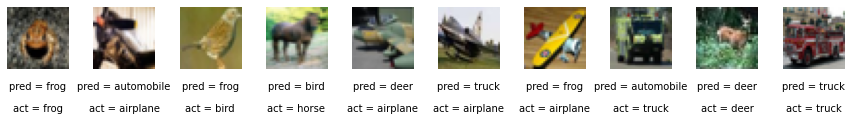

In [11]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

# 모델 성능 향상

In [12]:
from keras.layers import Conv2D

input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 20,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [13]:
# BatchNormalization, Dropout 적용 모델
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU, Flatten, Dropout
from keras.layers import Activation

input_layer = Input(shape=(32,32,3))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)

# 학습 및 시각화(결과 확인)

In [14]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4750 - accuracy: 0.4871
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0742 - accuracy: 0.6267
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9446 - accuracy: 0.6673
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8748 - accuracy: 0.6957
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8104 - accuracy: 0.7171
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7570 - accuracy: 0.7365
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7150 - accuracy: 0.7498
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6648 - accuracy: 0.7661
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6283 - accuracy: 0.7809
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.587

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7889 - accuracy: 0.7345


[0.7888740301132202, 0.734499990940094]

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

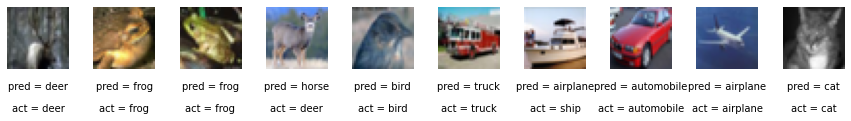

In [18]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)